# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Create DataFrames

In [ ]:
rick = pd.read_csv('data/rick_diamonds.csv')
rick.head()

In [ ]:
rick_aux = rick

In [ ]:
rick_aux['n_cut'] = rick_aux['cut'].map(cut_dict)
rick_aux['n_color'] = rick_aux['color'].map(color_dict)
rick_aux['n_clarity'] = rick_aux['clarity'].map(clarity_dict)

In [ ]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

In [ ]:
diamonds.info()

In [ ]:
diamonds.describe()

In [ ]:
diamonds.shape

# Cleaning the Data

### Transform Categorical into Numeric

In [ ]:
diamonds['clarity'].value_counts()
diamonds['color'].unique()
diamonds['cut'].unique()

In [ ]:
clarity_dict = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
color_dict = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
cut_dict = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}

In [ ]:
diamonds['n_cut'] = diamonds['cut'].map(cut_dict)
diamonds['n_color'] = diamonds['color'].map(color_dict)
diamonds['n_clarity'] = diamonds['clarity'].map(clarity_dict)

In [ ]:
diamonds.head()

In [ ]:
diamonds.describe()

In [ ]:
diamonds.info()

## Check variables correlation

In [ ]:
sns.pairplot(data=diamonds, y_vars='price', kind='reg')

In [ ]:
diamonds.corr()['price']

# Create model

## Model #1

### Model with all variables

In [ ]:
#Instanciante LinearRegression object
model = LinearRegression()

In [ ]:
#Define X and Y
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

In [ ]:
#Train the model
model.fit(x, y)

In [ ]:
# Create predict
y_pred = model.predict(x)

In [ ]:
#Check RMSE
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#Check R2 Score
r2_score(y, y_pred)
model.score(x, y)

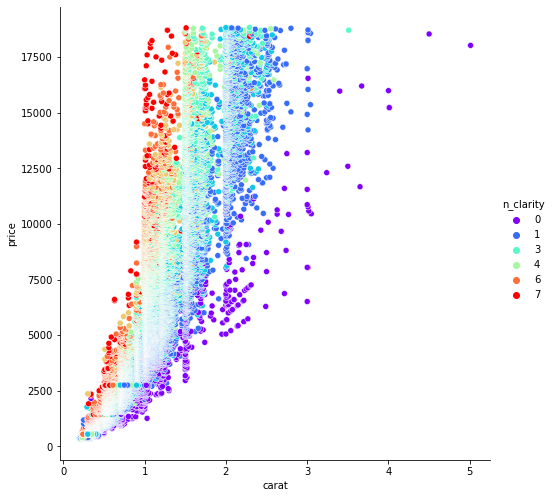

In [230]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'n_clarity',palette = 'rainbow',height = 7)

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

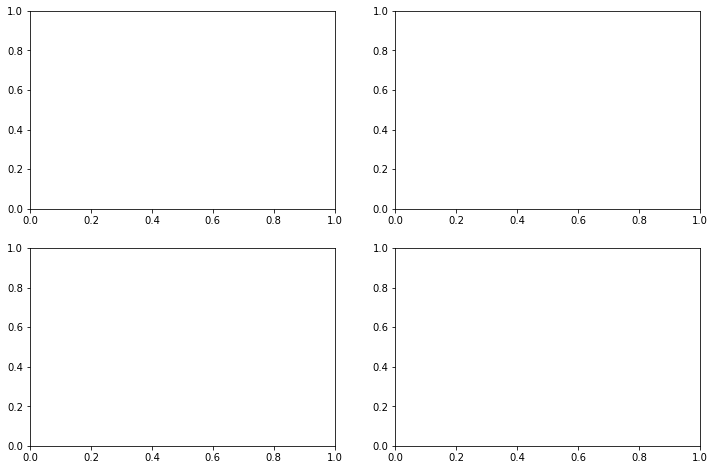

In [259]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8));
axes.set_xlim(0,5)

sns.scatterplot(data=diamonds[clarity_bad], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[0,0]);
sns.scatterplot(data=diamonds[clarity_med], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[0,1]);
sns.scatterplot(data=diamonds[clarity_good], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[1,0]);
sns.scatterplot(data=diamonds[clarity_nice], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[1,1]);

## Model #1 Result - RMSE: 1210,8732

## Model #2
## Idea - Create different coefficients for Clarity
### Separete Clarity in 4 bins

In [ ]:
# Other variables column list
column_list = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_color']

In [ ]:
# Create clarity mask (4 bins)
clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define X and Y with clarity mask
x_clarity_bad = diamonds.loc[clarity_bad, column_list]
x_clarity_med = diamonds.loc[clarity_med, column_list]
x_clarity_good = diamonds.loc[clarity_good, column_list]
x_clarity_nice = diamonds.loc[clarity_nice, column_list]

y_clarity_bad = diamonds.loc[clarity_bad, 'price']
y_clarity_med = diamonds.loc[clarity_med, 'price']
y_clarity_good = diamonds.loc[clarity_good, 'price']
y_clarity_nice = diamonds.loc[clarity_nice, 'price']

In [ ]:
# Instanciate one model per bin
model_clarity_bad = LinearRegression()
model_clarity_med = LinearRegression()
model_clarity_good = LinearRegression()
model_clarity_nice = LinearRegression()

In [ ]:
# Train models
model_clarity_bad.fit(x_clarity_bad, y_clarity_bad)
model_clarity_med.fit(x_clarity_med, y_clarity_med)
model_clarity_good.fit(x_clarity_good, y_clarity_good)
model_clarity_nice.fit(x_clarity_nice, y_clarity_nice)

In [ ]:
# Check individual score
print(model_clarity_bad.score(x_clarity_bad, y_clarity_bad))
print(model_clarity_med.score(x_clarity_med, y_clarity_med))
print(model_clarity_good.score(x_clarity_good, y_clarity_good))
print(model_clarity_nice.score(x_clarity_nice, y_clarity_nice))

In [ ]:
# Make predictions
y_pred_clarity_bad = model_clarity_bad.predict(x_clarity_bad)
y_pred_clarity_med = model_clarity_med.predict(x_clarity_med)
y_pred_clarity_good = model_clarity_good.predict(x_clarity_good)
y_pred_clarity_nice = model_clarity_nice.predict(x_clarity_nice)

In [ ]:
# Check individuals RMSE's
print(np.sqrt(mean_squared_error(y_clarity_bad, y_pred_clarity_bad)))
print(np.sqrt(mean_squared_error(y_clarity_med, y_pred_clarity_med)))
print(np.sqrt(mean_squared_error(y_clarity_good, y_pred_clarity_good)))
print(np.sqrt(mean_squared_error(y_clarity_nice, y_pred_clarity_nice)))

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model(row,models):
    if row['n_clarity'] == 0:
        return models['bad'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_clarity'] in [1,2] :
        return models['med'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_clarity'] in [3,4]:
        return models['good'].predict(pd.DataFrame(row[column_list]).T)[0]
    else:
        return models['nice'].predict(pd.DataFrame(row[column_list]).T)[0]

In [ ]:
predict = x.apply(verify_model, models = {'bad':model_clarity_bad,
                                            'med':model_clarity_med,
                                            'good':model_clarity_good,
                                            'nice':model_clarity_nice}, axis=1)

In [ ]:
# Check new R2 Score
r2_score(y, predict)

In [ ]:
# Check new RMSE
np.sqrt(mean_squared_error(y, predict))

## Model #2 Result - RMSE: 1013,2930

## Model #3
## Idea - Create different coefficients for color
### Separete Color in 4 bins

In [ ]:
# Other variables column list
column_list_1 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_clarity']

In [ ]:
# Create color mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

In [ ]:
# Define X and Y with color mask
x_color_bad = diamonds.loc[color_bad, column_list_1]
x_color_med = diamonds.loc[color_med, column_list_1]
x_color_good = diamonds.loc[color_good, column_list_1]
x_color_nice = diamonds.loc[color_nice, column_list_1]

y_color_bad = diamonds.loc[color_bad, 'price']
y_color_med = diamonds.loc[color_med, 'price']
y_color_good = diamonds.loc[color_good, 'price']
y_color_nice = diamonds.loc[color_nice, 'price']

In [ ]:
# Instanciate one model per bin
model_color_bad = LinearRegression()
model_color_med = LinearRegression()
model_color_good = LinearRegression()
model_color_nice = LinearRegression()

In [ ]:
# Train models
model_color_bad.fit(x_color_bad, y_color_bad)
model_color_med.fit(x_color_med, y_color_med)
model_color_good.fit(x_color_good, y_color_good)
model_color_nice.fit(x_color_nice, y_color_nice)

In [ ]:
# Check individual scores
print(model_color_bad.score(x_color_bad, y_color_bad))
print(model_color_med.score(x_color_med, y_color_med))
print(model_color_good.score(x_color_good, y_color_good))
print(model_color_nice.score(x_color_nice, y_color_nice))

In [ ]:
# Make predictions
y_pred_color_bad = model_color_bad.predict(x_color_bad)
y_pred_color_med = model_color_med.predict(x_color_med)
y_pred_color_good = model_color_good.predict(x_color_good)
y_pred_color_nice = model_color_nice.predict(x_color_nice)

In [ ]:
# Check individual RMSE's
print(np.sqrt(mean_squared_error(y_color_bad, y_pred_color_bad)))
print(np.sqrt(mean_squared_error(y_color_med, y_pred_color_med)))
print(np.sqrt(mean_squared_error(y_color_good, y_pred_color_good)))
print(np.sqrt(mean_squared_error(y_color_nice, y_pred_color_nice)))

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_2(row,models):
    if row['n_color'] == 0:
        return models['bad'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_color'] in [1,2] :
        return models['med'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_color'] in [3,4]:
        return models['good'].predict(pd.DataFrame(row[column_list]).T)[0]
    else:
        return models['nice'].predict(pd.DataFrame(row[column_list]).T)[0]

In [ ]:

predict_2 = x.apply(verify_model_2, models = {'bad':model_color_bad,
                                            'med':model_color_med,
                                            'good':model_color_good,
                                            'nice':model_color_nice}, axis=1)

In [ ]:
#Check new R2 Score
r2_score(y, predict_2)

In [ ]:
#Chekc new RMSE
np.sqrt(mean_squared_error(y, predict_2))

## Model #3 Result - RMSE: 1137,4981

## Model #4
## Idea - mix model #2 and #3

In [ ]:
column_list_2 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut']

In [ ]:
# Create color and clarity mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)
color_mask = {'bad':color_bad,'med':color_med, 'good':color_good, 'nice':color_nice}

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)
clarity_mask = {'bad':clarity_bad,'med':clarity_med, 'good':clarity_good, 'nice':clarity_nice}


In [ ]:
color_mask['bad']

In [ ]:
# Define X with color and clarity masks
i = 0
x_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            x_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), column_list_2]
            i += 1

In [ ]:
# Define Y with color and clarity masks
i = 0
y_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            y_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), 'price']
            i += 1

In [ ]:
# Instanciate one model per bin
model_color_clarity_dict = {}
for i in range(16):
    model_color_clarity_dict[i] = LinearRegression()

In [ ]:
# Train models
for i in range(16):
    model_color_clarity_dict[i].fit(x_color_clarity_dict[i], y_color_clarity_dict[i])

In [ ]:
# Check individual scores
for i in range(len(model_color_clarity_dict)):
    print(model_color_clarity_dict[i].score(x_color_clarity_dict[i], y_color_clarity_dict[i]))


In [ ]:
# Make predictions
y_pred_color_clarity_dict = {}
for i in range(len(model_color_clarity_dict)):
    y_pred_color_clarity_dict[i] = model_color_clarity_dict[i].predict(x_color_clarity_dict[i])

In [ ]:
# Check individual RMSE's
for i in range(len(model_color_clarity_dict)):
    print(np.sqrt(mean_squared_error(y_color_clarity_dict[i], y_pred_color_clarity_dict[i])))

In [ ]:
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_3(row,models):
    if row['n_color'] == 0 and row['n_clarity'] == 0:
        return models[0].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [1,2]:
        return models[1].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [3,4]:
        return models[2].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [5,6,7]:
        return models[3].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] == 0:
        return models[4].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [1,2]:
        return models[5].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [3,4]:
        return models[6].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [5,6,7]:
        return models[7].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] == 0:
        return models[8].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [1,2]:
        return models[9].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [3,4]:
        return models[10].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [5,6,7]:
        return models[11].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] == 0:
        return models[12].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [1,2]:
        return models[13].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [3,4]:
        return models[14].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [5,6,7]:
        return models[15].predict(pd.DataFrame(row[column_list_2]).T)[0]

In [ ]:
predict_3 = x.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
r2_score(y, predict_3)

In [ ]:
np.sqrt(mean_squared_error(y, predict_3))

In [ ]:
x_rick = rick_aux.drop(['color', 'cut', 'clarity'], axis=1)

In [ ]:
predict_rick = x_rick.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
rick['price_predicted'] = predict_rick

In [ ]:
rick

In [ ]:
rick.to_csv('data/rick_diamonds_price_model4.csv')

## Model #4 Result
## RMSE: 831,30
## Rick's RMSE: 845,09

## Model #5
### Use model RandomForestRegressor with 16 previous models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()

In [ ]:
column_list_2 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut']

In [ ]:
# Create color and clarity mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)
color_mask = {'bad':color_bad,'med':color_med, 'good':color_good, 'nice':color_nice}

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)
clarity_mask = {'bad':clarity_bad,'med':clarity_med, 'good':clarity_good, 'nice':clarity_nice}


In [ ]:
# Define X with color and clarity masks
i = 0
x_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            x_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), column_list_2]
            i += 1

In [ ]:
# Define Y with color and clarity masks
i = 0
y_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            y_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), 'price']
            i += 1

In [ ]:
# Instanciate one model per bin
model_color_clarity_dict = {}
for i in range(16):
    model_color_clarity_dict[i] = RandomForestRegressor()

In [ ]:
# Train models
for i in range(16):
    model_color_clarity_dict[i].fit(x_color_clarity_dict[i], y_color_clarity_dict[i])

In [ ]:
# Check individual scores
for i in range(len(model_color_clarity_dict)):
    print(model_color_clarity_dict[i].score(x_color_clarity_dict[i], y_color_clarity_dict[i]))


In [ ]:
# Make predictions
y_pred_color_clarity_dict = {}
for i in range(len(model_color_clarity_dict)):
    y_pred_color_clarity_dict[i] = model_color_clarity_dict[i].predict(x_color_clarity_dict[i])

In [ ]:
# Check individual RMSE's
for i in range(len(model_color_clarity_dict)):
    print(np.sqrt(mean_squared_error(y_color_clarity_dict[i], y_pred_color_clarity_dict[i])))

In [ ]:
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_3(row,models):
    if row['n_color'] == 0 and row['n_clarity'] == 0:
        return models[0].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [1,2]:
        return models[1].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [3,4]:
        return models[2].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [5,6,7]:
        return models[3].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] == 0:
        return models[4].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [1,2]:
        return models[5].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [3,4]:
        return models[6].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [5,6,7]:
        return models[7].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] == 0:
        return models[8].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [1,2]:
        return models[9].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [3,4]:
        return models[10].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [5,6,7]:
        return models[11].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] == 0:
        return models[12].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [1,2]:
        return models[13].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [3,4]:
        return models[14].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [5,6,7]:
        return models[15].predict(pd.DataFrame(row[column_list_2]).T)[0]

In [ ]:
# Predict training diamonds
predict_4 = x.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
r2_score(y, predict_4)

In [ ]:
np.sqrt(mean_squared_error(y, predict_4))

In [ ]:
# Predict Rick's diamonds
predict_rick = x_rick.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
# Put the pices in Rick's DataFrame
rick['price_predicted'] = predict_rick

In [ ]:
# Save the DataFrame
rick.to_csv('data/rick_diamonds_price_model5.csv')

## Model #5 Result
## RMSE: 258,12
## Rick's RMSE: 705,57

## Model #6
### Use model RandomForestRegressor alone

In [ ]:
#Instanciante LinearRegression object
model_6 = RandomForestRegressor()

In [ ]:
#Define X and Y
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

In [ ]:
#Train the model
model_6.fit(x, y)

In [ ]:
# Create predict
y_pred_6 = model_6.predict(x)

In [ ]:
#Check RMSE
np.sqrt(mean_squared_error(y, y_pred_6))

In [ ]:
#Check R2 Score
model_6.score(x, y)

In [ ]:
# Predict Rick's diamonds
predict_rick_6 = model_6.predict(x_rick)

In [ ]:
# Put the pices in Rick's DataFrame
rick['price_predicted'] = predict_rick_6

In [ ]:
# Save the DataFrame
rick.to_csv('data/rick_diamonds_price_model6.csv')

## Model #6 Result
## RMSE: 200,38
## Rick's RMSE: 539,98

## Model #7
### Check for Outliers

In [ ]:
sns.boxplot(y = diamonds['price'])

In [ ]:
diamonds.describe()['price']

In [ ]:
sns.displot(diamonds['price'])

In [ ]:
price = pd.DataFrame()
price['price'] = pd.cut(diamonds['price'], 5)

In [ ]:
price['price']

In [ ]:
plt.figure(figsize=(8,6));
plt.hist(diamonds['price'], bins=7);